In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from scipy.io import loadmat

# Logistic Regression

In [2]:
from scipy.io import loadmat

# Replace 'your_file.mat' with the actual path to your .mat file
mat_data = loadmat('data/LogReg_data_2020.mat')

# Parse Data
mat_a = mat_data['A']
mat_a0 = mat_data['A0']
b = mat_data['b'].flatten()
m = int(mat_data['m'][0][0])
n = int(mat_data['n'][0][0])


In [3]:
mat_a.shape, mat_a0.shape, b.shape, m, n

((100, 10), (100, 10), (100,), 100, 10)

In [4]:
from utils.solvers import grad_admm_logreg
from utils.logistic_regression import logistic_reg_neg_log_likelihood, logistic_reg_neg_log_likelihood_gradient
from utils.lasso import proximal_l1

x = (np.arange(n + 1) + 1).reshape((-1, 1))
logistic_reg_neg_log_likelihood_gradient(x, mat_a0, b)


array([[-0.05259785],
       [ 0.08879922],
       [ 0.10443917],
       [-0.10750185],
       [ 0.18306892],
       [-0.00623853],
       [ 0.22109224],
       [-0.04552904],
       [ 0.18392778],
       [ 0.1255906 ],
       [ 0.23920399]])

In [91]:
import importlib, utils.solvers
importlib.reload(utils.solvers)
from utils.solvers import *

In [92]:
func_caller = lambda x: logistic_reg_neg_log_likelihood(x, mat_a0, b)
gradient_caller = lambda x: logistic_reg_neg_log_likelihood_gradient(x, mat_a0, b)
t = 1.0
tau = .01

x_k, rel_errors = grad_admm_logreg(gradient_caller, proximal_l1, n+1, func_caller, tau, t, debug=True)

[Grad-ADMM] Iter 0: primal_res=0.175658, dual_res=0.175658, t=1.000e+00
[Grad-ADMM] Iter 10: primal_res=0.00284235, dual_res=0.018543, t=1.000e+00
[Grad-ADMM] Iter 20: primal_res=0.000677447, dual_res=0.00508833, t=1.000e+00
[Grad-ADMM] Iter 30: primal_res=0.000192608, dual_res=0.00151715, t=1.000e+00
[Grad-ADMM] Iter 40: primal_res=5.80644e-05, dual_res=0.000468027, t=1.000e+00
[Grad-ADMM] Iter 50: primal_res=1.79948e-05, dual_res=0.000146771, t=1.000e+00
[Grad-ADMM] Iter 60: primal_res=5.6551e-06, dual_res=4.64084e-05, t=1.000e+00
[Grad-ADMM] Iter 70: primal_res=1.78998e-06, dual_res=1.47362e-05, t=1.000e+00
[Grad-ADMM] Iter 80: primal_res=5.68674e-07, dual_res=4.68941e-06, t=1.000e+00
[Grad-ADMM] Iter 90: primal_res=1.81013e-07, dual_res=1.49395e-06, t=1.000e+00
[Grad-ADMM] Iter 100: primal_res=5.7675e-08, dual_res=4.76219e-07, t=1.000e+00
[Grad-ADMM] Iter 110: primal_res=1.83861e-08, dual_res=1.51848e-07, t=1.000e+00


In [93]:
x_k

array([[ 0.12348667],
       [-0.09555777],
       [-0.24958793],
       [ 0.42425074],
       [-0.23142164],
       [ 0.21074257],
       [-0.2191462 ],
       [ 0.26070452],
       [ 0.15513458],
       [ 0.11167911],
       [-0.01214061]])

Text(0, 0.5, 'Relative Error')

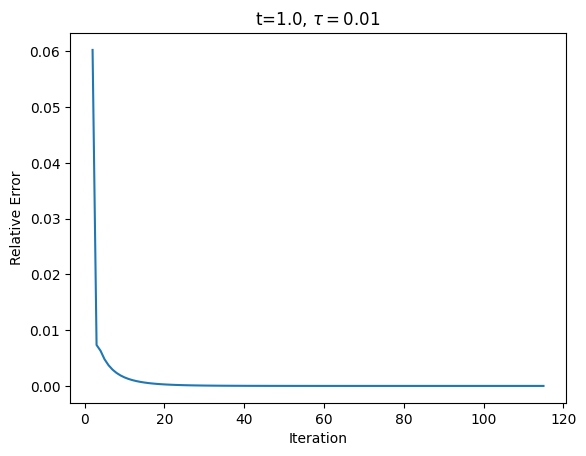

In [94]:
plt.plot(np.arange(1, len(rel_errors) + 1), rel_errors )
plt.title(rf't={t}, $\tau={tau}$')
plt.xlabel('Iteration')
plt.ylabel('Relative Error')

In [95]:
np.logspace(-1, 1, 3)

array([ 0.1,  1. , 10. ])

In [96]:
f'{1/3:.2f}'

'0.33'

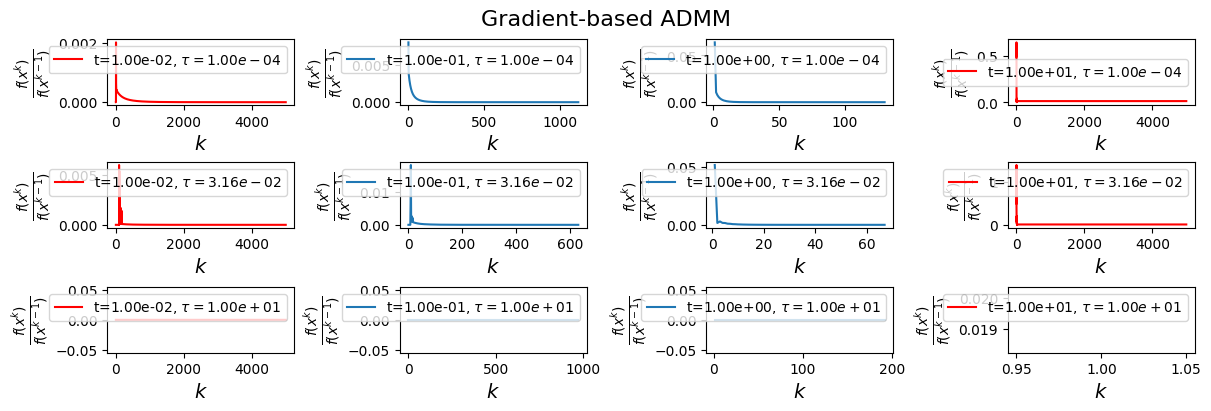

In [104]:
taus =  np.logspace(-4, 1, 3)
ts = np.logspace(-2, 1, 4)


fig = plt.figure(figsize=(12,4), layout='constrained')
axs = fig.subplots(len(taus), len(ts))
#axs = axs.flatten()
for i, tau in enumerate(taus):
    for j, t in enumerate(ts):
        x_min, rel_errors = x_k, rel_errors = grad_admm_logreg(gradient_caller, proximal_l1, n+1, func_caller, tau, t, debug=False)
        color = 'r' if len(rel_errors) == 5000 else 'C0'
        axs[i, j].plot(rel_errors, label=rf't={t:.2e}, $\tau={tau:.2e}$', color=color)
        axs[i, j].set_xlabel(r'$k$', fontsize=14)
        axs[i, j].set_ylabel(r'$\frac{f(x^k)}{f(x^{k-1})}$', fontsize=14)
        axs[i, j].legend()
fig.suptitle(f'Gradient-based ADMM', fontsize=16)
#plt.tight_layout()
plt.savefig("figures/grad_based_admm.png")